In [ ]:
!nvidia-smi

Thu Jul 15 10:54:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


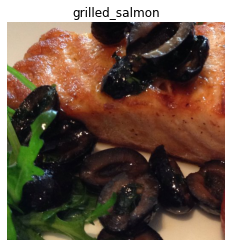

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 81s 219ms/step - loss: 2.1756 - accuracy: 0.2177 - val_loss: 2.0090 - val_accuracy: 0.2776
Epoch 2/5
235/235 [==============================] - 52s 221ms/step - loss: 1.8443 - accuracy: 0.3733 - val_loss: 1.9306 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.5215 - accuracy: 0.5055 - val_loss: 1.9879 - val_accuracy: 0.3200
Epoch 4/5
235/235 [==============================] - 52s 219ms/step - loss: 1.0756 - accuracy: 0.6539 - val_loss: 2.3148 - val_accuracy: 0.3044
Epoch 5/5
235/235 [==============================] - 51s 219ms/step - loss: 0.6582 - accuracy: 0.8052 - val_loss: 2.6518 - val_accuracy: 0.2724


In [ ]:
!wget https://raw.githubusercontent.com/B-Murali-Krishna/Projects/main/helper_functions.py

--2021-07-15 11:15:09--  https://raw.githubusercontent.com/B-Murali-Krishna/Projects/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14217 (14K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.88K  --.-KB/s    in 0s      

2021-07-15 11:15:10 (74.5 MB/s) - ‘helper_functions.py’ saved [14217/14217]



In [ ]:
from helper_functions import plot_loss_curves,pred_and_plot,load_and_prep_image

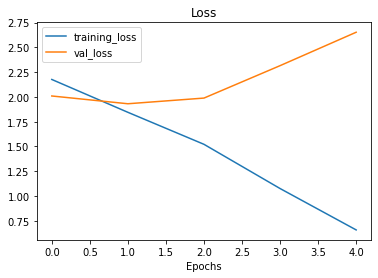

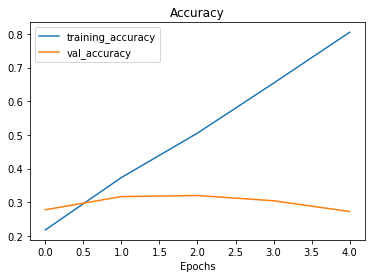

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_2 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_1)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 130s 550ms/step - loss: 2.2354 - accuracy: 0.1793 - val_loss: 2.0547 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 129s 548ms/step - loss: 2.0743 - accuracy: 0.2615 - val_loss: 1.9349 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 129s 551ms/step - loss: 2.0113 - accuracy: 0.2908 - val_loss: 1.9052 - val_accuracy: 0.3380
Epoch 4/5
235/235 [==============================] - 129s 550ms/step - loss: 1.9888 - accuracy: 0.3096 - val_loss: 1.8860 - val_accuracy: 0.3500
Epoch 5/5
235/235 [==============================] - 129s 550ms/step - loss: 1.9550 - accuracy: 0.3195 - val_loss: 1.7882 - val_accuracy: 0.3772


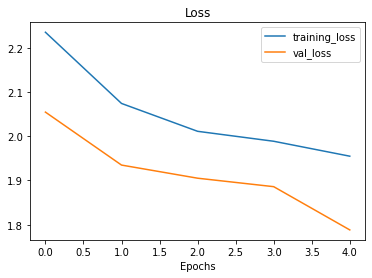

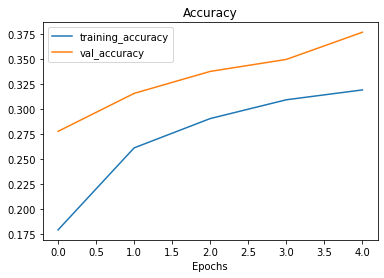

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

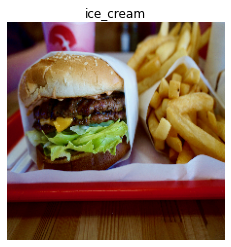

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-hamburger.jpeg")

# Make a prediction
pred = model_2.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

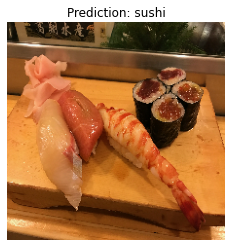

In [ ]:
pred_and_plot(model_2,
              filename='03-sushi.jpeg',
              class_names=class_names)

In [ ]:
# Save a model
model_2.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in a model and evaluate it
loaded_model_2 = tf.keras.models.load_model("saved_trained_model")
loaded_model_2.evaluate(test_data)

79/79 [==============================] - 13s 157ms/step - loss: 1.7882 - accuracy: 0.3772


[1.7881755828857422, 0.37720000743865967]

In [ ]:
# Compare our unsaved model's results (same as above)
model_2.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 1.7882 - accuracy: 0.3772


[1.7881755828857422, 0.37720000743865967]